# Machine Learning Home Task 3

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Loading dataset
df = pd.read_csv('cereal.csv')

# Displaying first five rows and colums 
print(df.head())

                        name mfr type  calories  protein  fat  sodium  fiber  \
0                  100% Bran   N    C        70        4    1     130   10.0   
1          100% Natural Bran   Q    C       120        3    5      15    2.0   
2                   All-Bran   K    C        70        4    1     260    9.0   
3  All-Bran with Extra Fiber   K    C        50        4    0     140   14.0   
4             Almond Delight   R    C       110        2    2     200    1.0   

   carbo  sugars  potass  vitamins  shelf  weight  cups     rating  
0    5.0       6     280        25      3     1.0  0.33  68.402973  
1    8.0       8     135         0      3     1.0  1.00  33.983679  
2    7.0       5     320        25      3     1.0  0.33  59.425505  
3    8.0       0     330        25      3     1.0  0.50  93.704912  
4   14.0       8      -1        25      3     1.0  0.75  34.384843  


In [6]:
print(df.info)

<bound method DataFrame.info of                          name mfr type  calories  protein  fat  sodium  fiber  \
0                   100% Bran   N    C        70        4    1     130   10.0   
1           100% Natural Bran   Q    C       120        3    5      15    2.0   
2                    All-Bran   K    C        70        4    1     260    9.0   
3   All-Bran with Extra Fiber   K    C        50        4    0     140   14.0   
4              Almond Delight   R    C       110        2    2     200    1.0   
..                        ...  ..  ...       ...      ...  ...     ...    ...   
72                    Triples   G    C       110        2    1     250    0.0   
73                       Trix   G    C       110        1    1     140    0.0   
74                 Wheat Chex   R    C       100        3    1     230    3.0   
75                   Wheaties   G    C       100        3    1     200    3.0   
76        Wheaties Honey Gold   G    C       110        2    1     200    1.0

In [4]:
print (df.describe())

         calories    protein        fat      sodium      fiber      carbo  \
count   77.000000  77.000000  77.000000   77.000000  77.000000  77.000000   
mean   106.883117   2.545455   1.012987  159.675325   2.151948  14.597403   
std     19.484119   1.094790   1.006473   83.832295   2.383364   4.278956   
min     50.000000   1.000000   0.000000    0.000000   0.000000  -1.000000   
25%    100.000000   2.000000   0.000000  130.000000   1.000000  12.000000   
50%    110.000000   3.000000   1.000000  180.000000   2.000000  14.000000   
75%    110.000000   3.000000   2.000000  210.000000   3.000000  17.000000   
max    160.000000   6.000000   5.000000  320.000000  14.000000  23.000000   

          sugars      potass    vitamins      shelf     weight       cups  \
count  77.000000   77.000000   77.000000  77.000000  77.000000  77.000000   
mean    6.922078   96.077922   28.246753   2.207792   1.029610   0.821039   
std     4.444885   71.286813   22.342523   0.832524   0.150477   0.232716  

In [5]:
print(df.isnull().sum())

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64


In [6]:
print(df[df.isnull().any(axis=1)])


Empty DataFrame
Columns: [name, mfr, type, calories, protein, fat, sodium, fiber, carbo, sugars, potass, vitamins, shelf, weight, cups, rating]
Index: []


In [7]:
# Filling the missing values by the mean of the column (whats its purpose to do that?)

df.fillna(df.select_dtypes(include=['number']).mean(), inplace = True)

Finding corelation

Non-numeric columns: Index(['name', 'mfr', 'type'], dtype='object')
Columns after encoding: Index(['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars',
       'potass', 'vitamins', 'shelf', 'weight', 'cups', 'rating',
       'name_100% Natural Bran', 'name_All-Bran',
       'name_All-Bran with Extra Fiber', 'name_Almond Delight',
       'name_Apple Cinnamon Cheerios', 'name_Apple Jacks', 'name_Basic 4',
       'name_Bran Chex', 'name_Bran Flakes', 'name_Cap'n'Crunch',
       'name_Cheerios', 'name_Cinnamon Toast Crunch', 'name_Clusters',
       'name_Cocoa Puffs', 'name_Corn Chex', 'name_Corn Flakes',
       'name_Corn Pops', 'name_Count Chocula', 'name_Cracklin' Oat Bran',
       'name_Cream of Wheat (Quick)', 'name_Crispix',
       'name_Crispy Wheat & Raisins', 'name_Double Chex', 'name_Froot Loops',
       'name_Frosted Flakes', 'name_Frosted Mini-Wheats',
       'name_Fruit & Fibre Dates; Walnuts; and Oats', 'name_Fruitful Bran',
       'name_Fruity Pebbles', 'name_

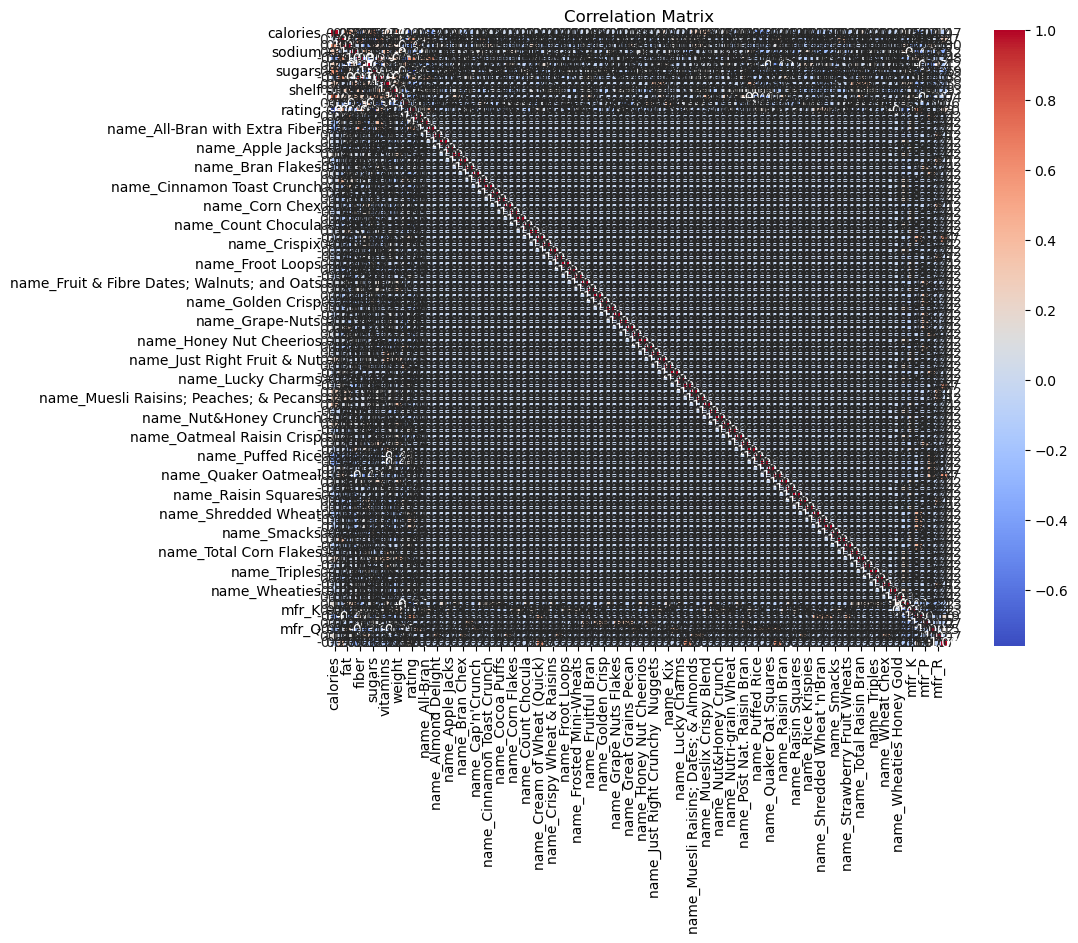

rating                            1.000000
fiber                             0.584160
mfr_N                             0.527063
protein                           0.470618
name_All-Bran with Extra Fiber    0.419511
                                    ...   
mfr_G                            -0.370699
sodium                           -0.401295
fat                              -0.409284
calories                         -0.689376
sugars                           -0.759675
Name: rating, Length: 96, dtype: float64


In [14]:

non_numeric_cols = df.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols)

df_encoded = pd.get_dummies(df, columns=non_numeric_cols, drop_first=True)

print("Columns after encoding:", df_encoded.columns)

correlation_matrix = df_encoded.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.title('Correlation Matrix')
plt.show()

target_variable_name = 'rating'
if target_variable_name in df_encoded.columns:
    target_correlation = correlation_matrix[target_variable_name].sort_values(ascending=False)
    print(target_correlation)
else:
    print(f"'{target_variable_name}' is not found in the DataFrame columns.")


Question: Visulaizations

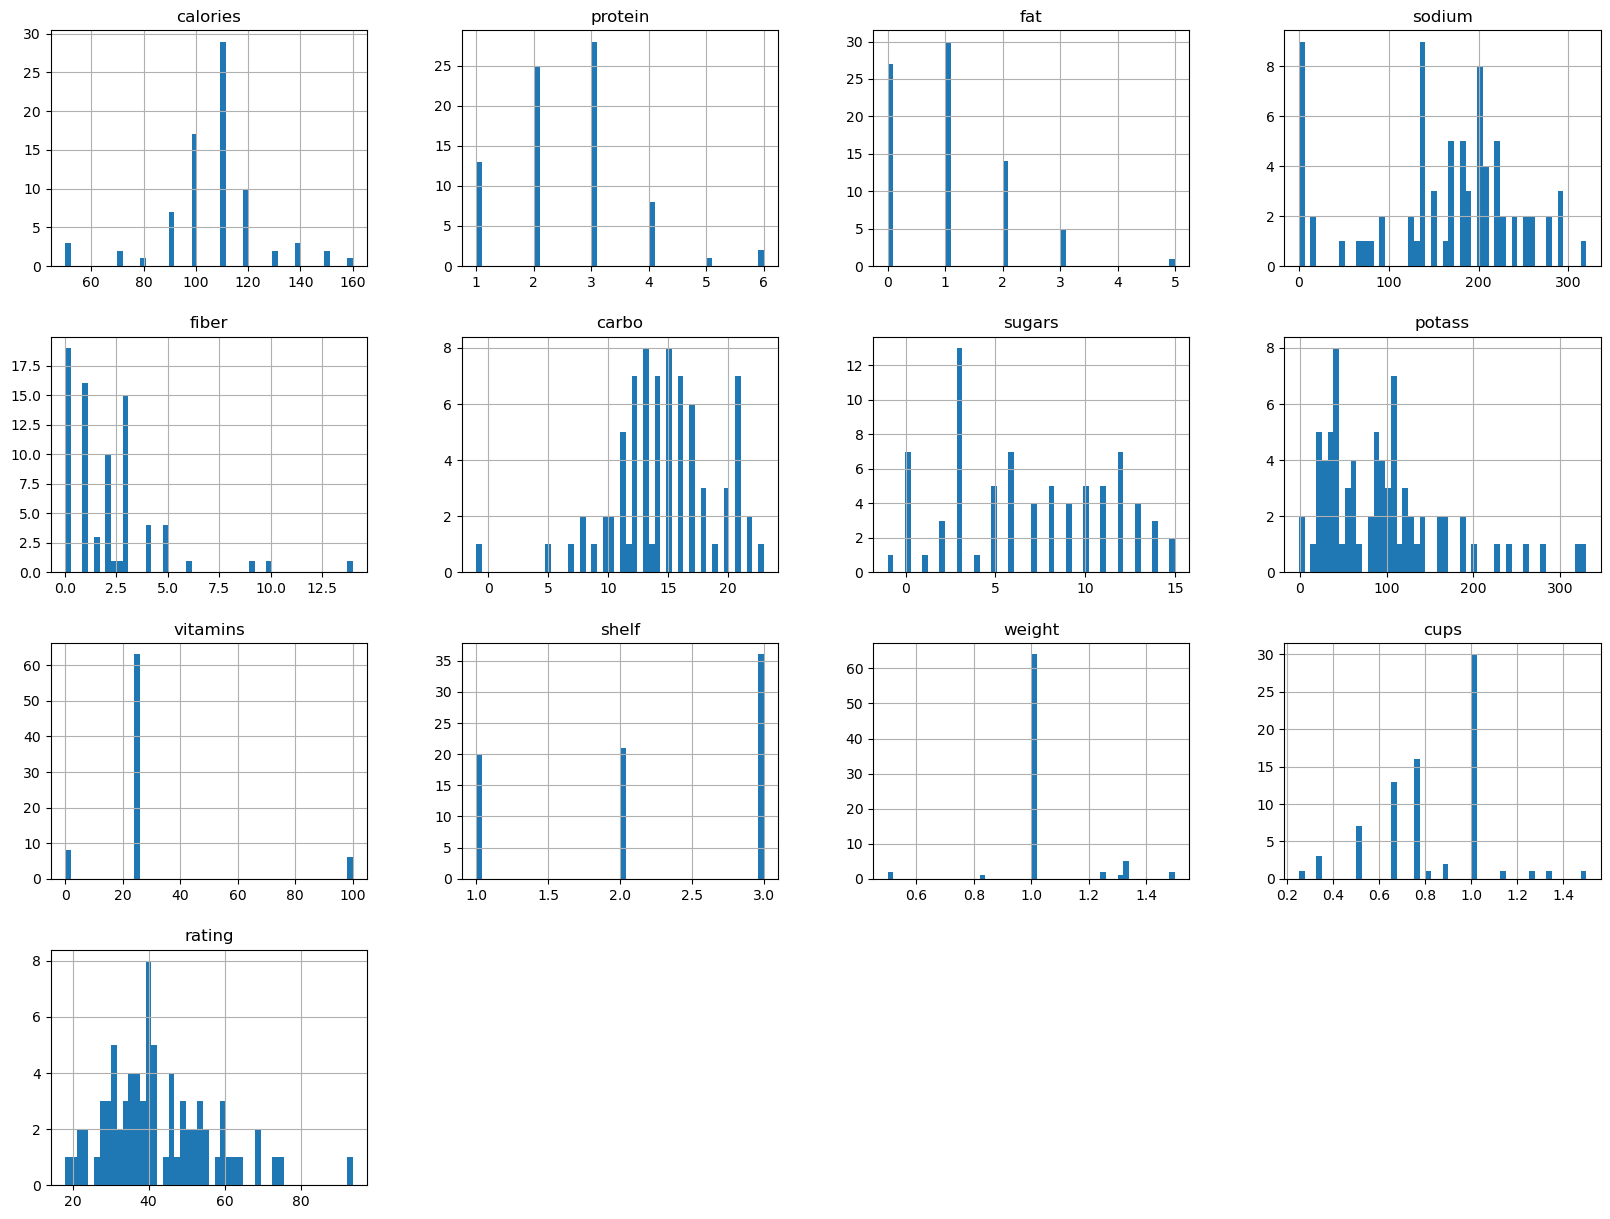

In [5]:
df.hist(bins=50, figsize=(20,15))
plt.show()

Question 6 , 7 , 8 : Splitting the datset + training linear regression and finding accuracy of the Model

In [13]:

print("Columns in the encoded DataFrame:", df_encoded.columns)

target_variable_name = 'rating'  

X = df_encoded.drop(columns=[target_variable_name])  # Features
y = df_encoded[target_variable_name]  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')


Columns in the encoded DataFrame: Index(['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars',
       'potass', 'vitamins', 'shelf', 'weight', 'cups', 'rating',
       'name_100% Natural Bran', 'name_All-Bran',
       'name_All-Bran with Extra Fiber', 'name_Almond Delight',
       'name_Apple Cinnamon Cheerios', 'name_Apple Jacks', 'name_Basic 4',
       'name_Bran Chex', 'name_Bran Flakes', 'name_Cap'n'Crunch',
       'name_Cheerios', 'name_Cinnamon Toast Crunch', 'name_Clusters',
       'name_Cocoa Puffs', 'name_Corn Chex', 'name_Corn Flakes',
       'name_Corn Pops', 'name_Count Chocula', 'name_Cracklin' Oat Bran',
       'name_Cream of Wheat (Quick)', 'name_Crispix',
       'name_Crispy Wheat & Raisins', 'name_Double Chex', 'name_Froot Loops',
       'name_Frosted Flakes', 'name_Frosted Mini-Wheats',
       'name_Fruit & Fibre Dates; Walnuts; and Oats', 'name_Fruitful Bran',
       'name_Fruity Pebbles', 'name_Golden Crisp', 'name_Golden Grahams',
       'name_Grape N

# Machine Learning Lab Tasks 3

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading dataset
df = pd.read_csv('2014-Inflation-America.csv')

# Displaying first five rows and colums 
print(df.head())

        Neighborhood  Id  Estimate; Total:  Margin of Error; Total:  \
0   Allegheny Center   1               733               103.000000   
1     Allegheny West   2               150                46.000000   
2          Allentown   3              1138               152.751432   
3          Arlington   4               685               105.366029   
4  Arlington Heights   5               170                69.000000   

   Estimate; Householder under 25 years:  \
0                                    138   
1                                     12   
2                                      0   
3                                     59   
4                                     29   

   Margin of Error; Householder under 25 years:  \
0                                     56.000000   
1                                     12.000000   
2                                     17.320508   
3                                     40.261644   
4                                     24.000000   

 

In [3]:
#Exploring the dataset

print(df.info)

<bound method DataFrame.info of            Neighborhood  Id  Estimate; Total:  Margin of Error; Total:  \
0      Allegheny Center   1               733               103.000000   
1        Allegheny West   2               150                46.000000   
2             Allentown   3              1138               152.751432   
3             Arlington   4               685               105.366029   
4     Arlington Heights   5               170                69.000000   
..                  ...  ..               ...                      ...   
86  Upper Lawrenceville  87              1262               144.100659   
87             West End  88               120                59.000000   
88         West Oakland  89               592                89.106678   
89             Westwood  90              1514               118.827606   
90              Windgap  91               660               101.242284   

    Estimate; Householder under 25 years:  \
0                                 

In [4]:
print (df.describe())

             Id  Estimate; Total:  Margin of Error; Total:  \
count  91.00000         91.000000                91.000000   
mean   46.00000       1469.560440               134.334989   
std    26.41338       1450.270007                76.940098   
min     1.00000          0.000000                 9.000000   
25%    23.50000        472.500000                71.500000   
50%    46.00000       1138.000000               126.467387   
75%    68.50000       1857.500000               169.156980   
max    91.00000       7462.000000               368.263493   

       Estimate; Householder under 25 years:  \
count                              91.000000   
mean                              131.406593   
std                               254.017321   
min                                 0.000000   
25%                                15.000000   
50%                                51.000000   
75%                               117.500000   
max                              1530.000000   

       M

In [5]:
# seeing the missing values 

print(df.isnull().sum())

Neighborhood                                                              0
Id                                                                        0
Estimate; Total:                                                          0
Margin of Error; Total:                                                   0
Estimate; Householder under 25 years:                                     0
                                                                         ..
Margin of Error; Householder 65 years and over: - $125,000 to $149,999    0
Estimate; Householder 65 years and over: - $150,000 to $199,999           0
Margin of Error; Householder 65 years and over: - $150,000 to $199,999    0
Estimate; Householder 65 years and over: - $200,000 or more               0
Margin of Error; Householder 65 years and over: - $200,000 or more        0
Length: 140, dtype: int64


In [6]:
# displaying missing values by rows 

print(df[df.isnull().any(axis=1)])



Empty DataFrame
Columns: [Neighborhood, Id, Estimate; Total:, Margin of Error; Total:, Estimate; Householder under 25 years:, Margin of Error; Householder under 25 years:, Estimate; Householder under 25 years: - Less than $10,000, Margin of Error; Householder under 25 years: - Less than $10,000, Estimate; Householder under 25 years: - $10,000 to $14,999, Margin of Error; Householder under 25 years: - $10,000 to $14,999, Estimate; Householder under 25 years: - $15,000 to $19,999, Margin of Error; Householder under 25 years: - $15,000 to $19,999, Estimate; Householder under 25 years: - $20,000 to $24,999, Margin of Error; Householder under 25 years: - $20,000 to $24,999, Estimate; Householder under 25 years: - $25,000 to $29,999, Margin of Error; Householder under 25 years: - $25,000 to $29,999, Estimate; Householder under 25 years: - $30,000 to $34,999, Margin of Error; Householder under 25 years: - $30,000 to $34,999, Estimate; Householder under 25 years: - $35,000 to $39,999, Margin o

In [7]:
# Filling the missing values by the mean of the column (whats its purpose to do that?)

df.fillna(df.select_dtypes(include=['number']).mean(), inplace = True)

In [8]:
# fiiling missing values with a specific value 

df.fillna(0, inplace = True)

In [9]:
# Displaying a specific Column

print(df['Margin of Error; Householder under 25 years: - $10,000 to $14,999'])

0     17.000000
1     10.000000
2     17.320508
3     17.320508
4     14.000000
        ...    
86    17.320508
87    16.000000
88    30.675723
89    14.142136
90    14.142136
Name: Margin of Error; Householder under 25 years: - $10,000 to $14,999, Length: 91, dtype: float64


In [10]:
# Displaying a specific row

print(df.iloc[4])


Neighborhood                                                              Arlington Heights
Id                                                                                        5
Estimate; Total:                                                                        170
Margin of Error; Total:                                                                69.0
Estimate; Householder under 25 years:                                                    29
                                                                                ...        
Margin of Error; Householder 65 years and over: - $125,000 to $149,999                 10.0
Estimate; Householder 65 years and over: - $150,000 to $199,999                           0
Margin of Error; Householder 65 years and over: - $150,000 to $199,999                 10.0
Estimate; Householder 65 years and over: - $200,000 or more                               0
Margin of Error; Householder 65 years and over: - $200,000 or more              

In [11]:
#Display a subset of the dataframe 
print(df[['Estimate; Householder under 25 years: - $30,000 to $34,999', 'Margin of Error; Householder under 25 years: - $35,000 to $39,999']].head())

   Estimate; Householder under 25 years: - $30,000 to $34,999  \
0                                                  0            
1                                                  0            
2                                                  0            
3                                                  0            
4                                                 13            

   Margin of Error; Householder under 25 years: - $35,000 to $39,999  
0                                          12.000000                  
1                                          10.000000                  
2                                          17.320508                  
3                                          17.320508                  
4                                          10.000000                  


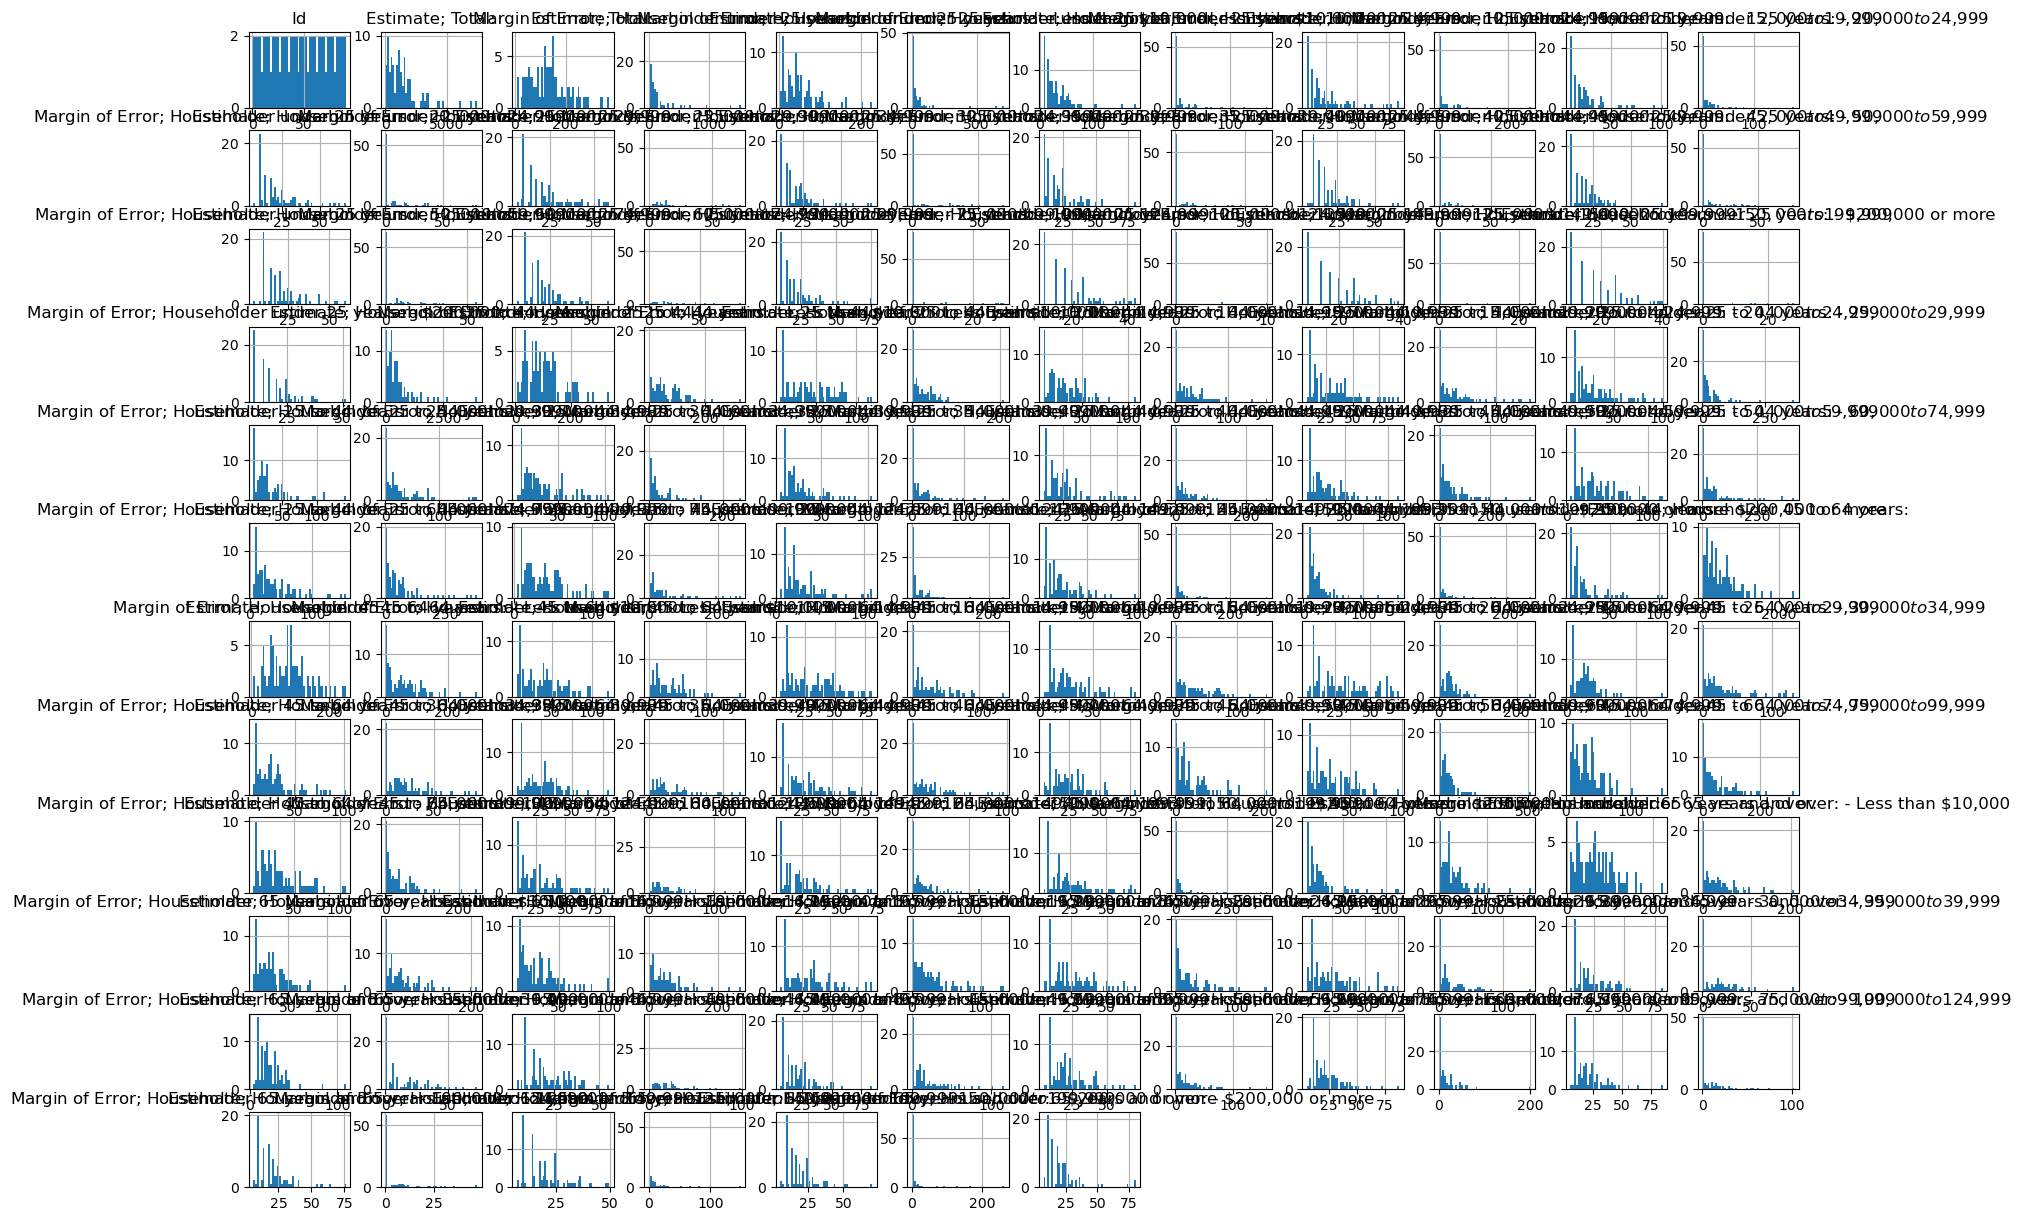

In [12]:
# Ploting histograms for numerical colums

df.hist(bins=50, figsize=(20,15))
plt.show()

In [13]:
# identifying Anomalies

from scipy import stats

df['z_score'] = stats.zscore(df['Estimate; Householder under 25 years: - Less than $10,000'])
print(df[df['z_score'].abs() > 3])

       Neighborhood  Id  Estimate; Total:  Margin of Error; Total:  \
19  Central Oakland  20              1918               152.676128   
56    North Oakland  57              3048               239.739442   
68        Shadyside  69              7462               368.263493   

    Estimate; Householder under 25 years:  \
19                                   1366   
56                                    977   
68                                   1530   

    Margin of Error; Householder under 25 years:  \
19                                    152.918279   
56                                    162.354550   
68                                    226.991189   

    Estimate; Householder under 25 years: - Less than $10,000  \
19                                                455           
56                                                712           
68                                                644           

    Margin of Error; Householder under 25 years: - Less than $10,000

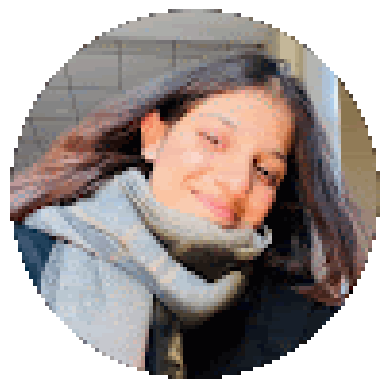

Image Format:GIF
Image Size: (96, 96) (width,height)
Image Mode: P
pixel at(10,10): 0


In [14]:
# Image Analysis

from PIL import Image

# Opeining an image using PIL

image_path = 'Ayesha profile google picture.gif'
path_image = Image.open(image_path)

# Displaying the image 
plt.imshow(path_image)
plt.axis('off')
plt.show()

#Explore image propoerties
print(f"Image Format:{path_image.format}")
print(f"Image Size: {path_image.size} (width,height)") 
print(f"Image Mode: {path_image.mode}")

#Access pixel data
pixels = path_image.load()

#print the pixel value at (x=10,y=10)
print(f"pixel at(10,10): {pixels[10, 10]}")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import logisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score, recall_score, f1_score, roc_curve, roc_auc_score

# loading iris dataset
df = pd.read_csv('iris.csv')

iris['species'] = iris['species'].apply(lambda x: 1 if x == 'setosa' else 0)

x = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = iris['Species']

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=42)

model - logisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 =f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

#Confsion Matrix